In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [28]:
houses = pd.read_csv(r"C:\Users\GASTO\Downloads\Real_Estate.csv")

In [29]:
houses

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [30]:
houses["Transaction date"]=pd.to_datetime(houses['Transaction date'])
houses["Year"] = houses["Transaction date"].dt.year
houses["Month"] = houses["Transaction date"].dt.month
houses["Day"] = houses["Transaction date"].dt.day
houses.drop("Transaction date",axis=1,inplace=True)

In [31]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

In [32]:
x = houses.drop("House price of unit area",axis=1)
y = houses["House price of unit area"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [34]:
# model the data
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

LinearRegression()

In [35]:
#predicting
y_train_pred=lin_reg.predict(x_train_scaled)
y_test_pred=lin_reg.predict(x_test_scaled)

In [36]:
# evaluation of the model
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print(f'mean_squared_error(train):{mse_train}')
print(f'mean_squared_error(test):{mse_test}')

mae_train=mean_absolute_error(y_train,y_train_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
print(f'mean absolute error(train):{mae_train}')
print(f'mean absolute error(test):{mae_test}')
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)
print(f'R2(Train):{r2_train}')
print(f'R2(Test):{r2_test}')

mean_squared_error(train):115.80238876675249
mean_squared_error(test):127.90830929200978
mean absolute error(train):9.135327511008184
mean absolute error(test):9.699832163677268
R2(Train):0.5166717016115385
R2(Test):0.5376397545747762


# findings
 - training is performing better than test in the mean absolute error and mean squared error
 - r2(test) is performing better than r2(train) recall in r2 score  we are moving closer to 1
 - in mean absolute error relate to house prizing indacates that its predicting 9 units more and in mean abosute test its also predicting 9 units less on the actual house prizing hence it can be both

In [13]:
houses.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year,Month,Day
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149,2012.630435,6.381643,15.642512
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935,0.483271,3.580855,8.697651
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000,2012.000000,1.000000,1.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493,2012.000000,3.000000,8.250000
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070,2013.000000,6.000000,16.000000
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184,2013.000000,10.000000,23.000000
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716,2013.000000,12.000000,31.000000


# linearity

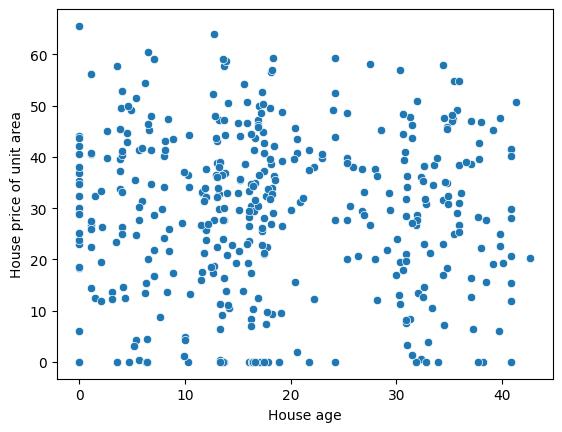

In [14]:
# scatterplots of both x and y choose features that relate with the y in our data
sns.scatterplot(data=houses, x="House age", y="House price of unit area")
plt.show()

no linearity in our two entities

In [11]:
houses['Year'].value_counts()

Year
2013    261
2012    153
Name: count, dtype: int64

In [17]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

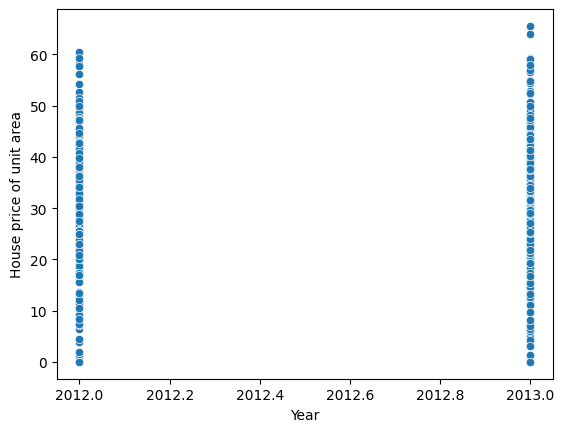

In [18]:
sns.scatterplot(data=houses,x='Year',y='House price of unit area')
plt.show()

In [12]:
houses['Month'].value_counts()

Month
3     45
11    42
1     42
4     40
9     39
7     39
10    38
12    34
6     34
5     33
2     27
8      1
Name: count, dtype: int64

In [15]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

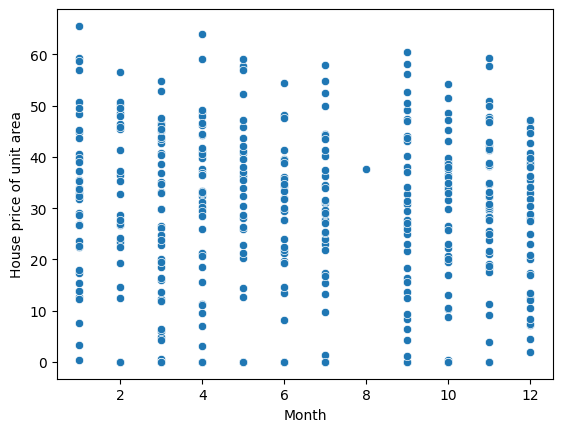

In [16]:
sns.scatterplot(data=houses,x='Month',y='House price of unit area')
plt.show()

In [19]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

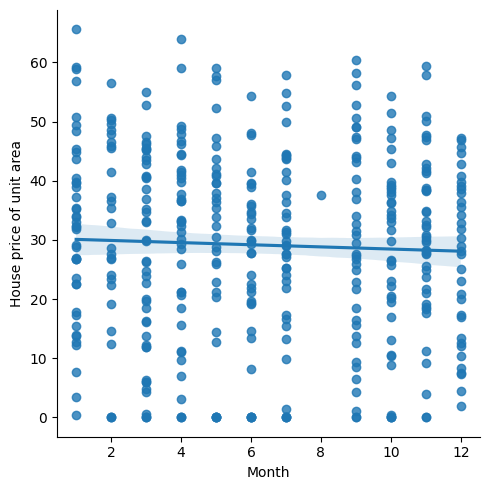

In [20]:
sns.lmplot(data=houses,x='Month',y='House price of unit area')
plt.show()

- the lightblue which is transformation band shade are the confidence levels by default its 95% 
- it gives us the transformation of data in statistics will fall under that line


In [21]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

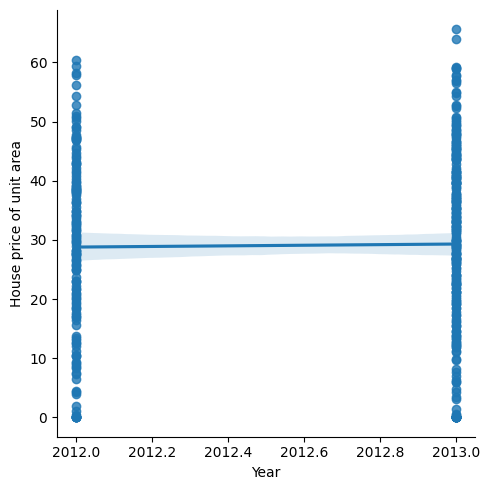

In [22]:
sns.lmplot(data=houses,x='Year',y='House price of unit area')
plt.show()

shows that year has no effect of the change of house price of unit area  since it only draws a straight line implying that the two i.e year and house price of unit area are independent.

In [23]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

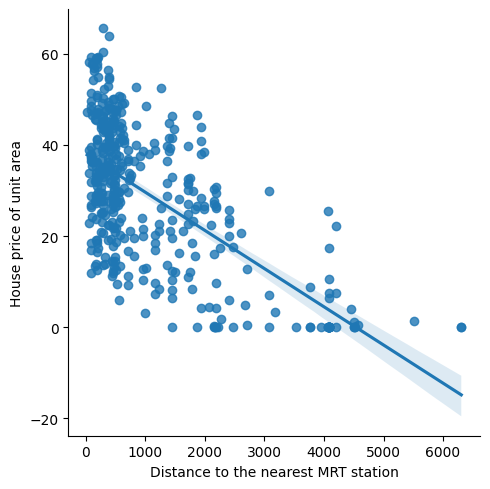

In [24]:
sns.lmplot(data=houses,x='Distance to the nearest MRT station',y='House price of unit area')
plt.show()

In [13]:
houses['Day'].value_counts()

Day
12    20
19    20
2     19
25    17
16    16
20    16
3     15
1     15
26    15
22    15
23    15
17    14
15    14
10    14
7     14
14    13
21    13
24    13
28    13
11    13
18    12
5     12
6     11
30    11
9     11
4     10
13    10
31     9
29     8
27     8
8      8
Name: count, dtype: int64

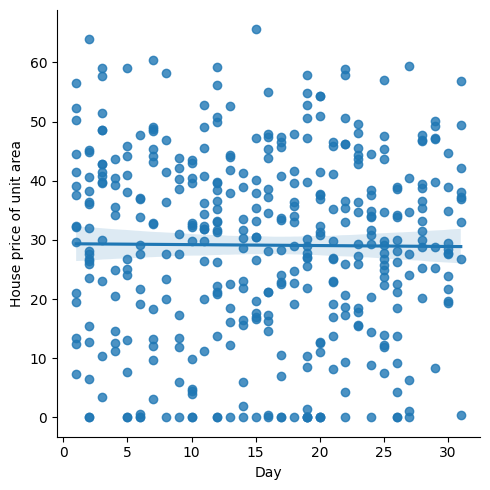

In [27]:
sns.lmplot(data=houses, x="Day", y="House price of unit area")
plt.show()

# conclusion
- linearity assumption is not met hence transformation is needed in the data
# addressing Non-Linearity
- Polynomial transformations
- Log transformation ,square root transformations

In [37]:
# compute the rediduals
residuals=y_test-y_test_pred
residuals

358    -1.312212
350     3.120217
373    -2.146334
399    12.047450
369    17.436445
         ...    
31     -7.594214
283   -10.675322
157   -18.747206
203    -8.327684
208   -10.942773
Name: House price of unit area, Length: 83, dtype: float64

look for independence of residuals
- visualize them with a plt

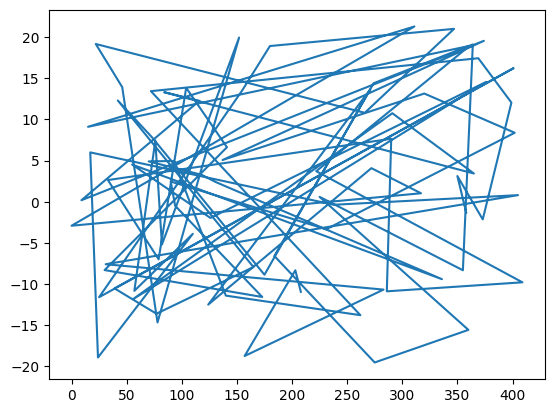

In [37]:
plt.plot(residuals)
plt.show()

this shows that the residuals are independent of each other since the line plot does not follow a certain formatt.that what is expected of residuals to be independent

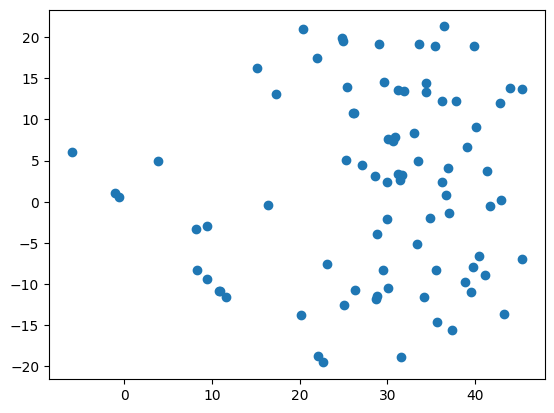

In [38]:
plt.scatter(y_test_pred,residuals)


there is a less pattern on the scatterplot  which is quite good
we can use statmodels by Durbin-watson test

In [22]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 399.6 kB/s eta 0:00:24
   --- ------------------------------------ 0.8/9.8 MB 501.2 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.8 MB 501.2 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.8 MB 501.2 kB/s eta 0:00:19
   ---- ----------------------------------- 1.0/9.8 MB 470.6 kB/s eta 0:00:19
   ---- ----------------------------------- 1.0/9.8 MB 470

In [23]:
import statsmodels.api as sm

In [24]:
from statsmodels.stats.stattools import durbin_watson

In [38]:
durbin_watson(residuals)

np.float64(1.6526309692818488)

durbin_watson is a autocorrelation test :

- it has a range of 0 to 4 where,

      - a value 2.0 indicates there is no autocorrelation detected in the sample

      - a value from 0 to less than 2 points to a positive autocorrelation and from 2 to 4 means a negative autocorrelation
      
       - from our visualization our value is seen to be closer to 2 showing that there is less or no autocorrelation which is proved bythe line plot above
       
        - plz note that autocorrelation we are basically talking about independence

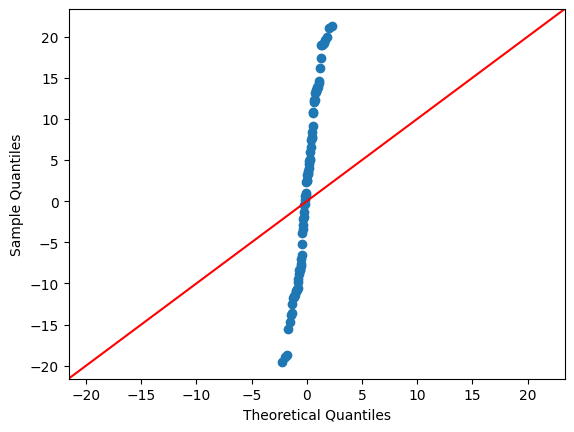

In [39]:
# nomality of residuals
sm.qqplot(residuals,line='45')
plt.show()

for we to say that there is normality in our residuals we need them to align with the diagonal line ,since from our data they are not on the diagonal line we say that there s no normality 

 -so from our data there is linearity in our data bt we are violating a rule of normality in our residuals

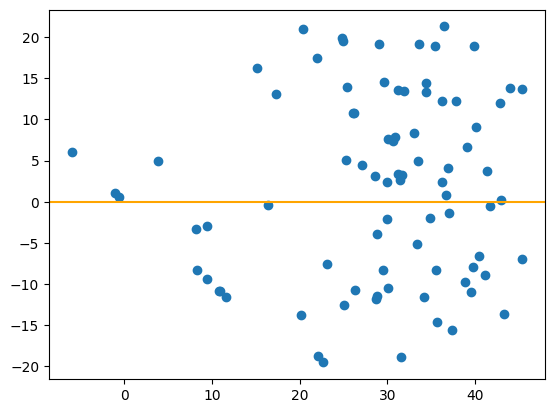

In [42]:
# Heteroscedacity our assumption to check is uniform variance at every level of our independent variables
plt.scatter(y_test_pred,residuals)
plt.axhline(0,color='orange')
plt.show()

from these visualization we see:
- we don't see a pattern  bt our data has constant variance within a certain range that us from 0 to 2o and from 0 to -20 

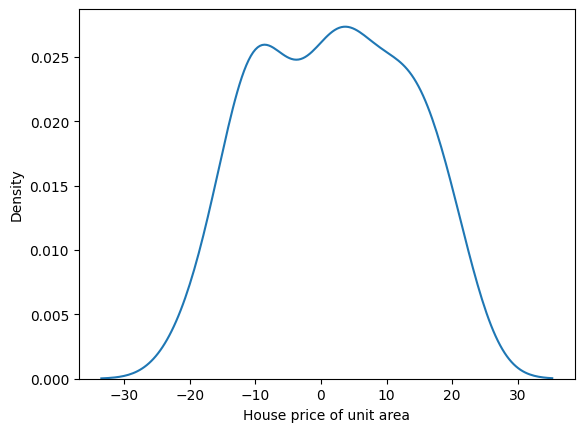

In [45]:
sns.kdeplot(residuals)
plt.show()

multicollinearity

In [ ]:
houses.corr()
sns.heatmap(houses,annot=True)
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
x.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude', 'Year',
       'Month', 'Day'],
      dtype='object')

In [54]:
df_houses=pd.DataFrame()
df_houses['feature']=x.columns
df_houses['houses']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
df_houses

,feature,houses
0,House age,3.521536e+00
1,Distance to the nearest MRT station,1.809389e+00
2,Number of convenience stores,3.274024e+00
3,Latitude,1.075204e+06
4,Longitude,1.720066e+07
5,Year,1.771604e+07
6,Month,6.997268e+00
7,Day,4.278860e+00


 - values:5-10 indicates high multicollinearity in our features

 - very small- no multicollinearity in our features
 
 - on our data we can see they are all small values hence it shows that is no multicollinearity in our data

# how to adress non-linearity in our data:
- polynomial tranformation

- log transformation,squarerroot transformaton

In [55]:
houses.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day'],
      dtype='object')

In [58]:
houses['log_House age']=np.log(houses['House age'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


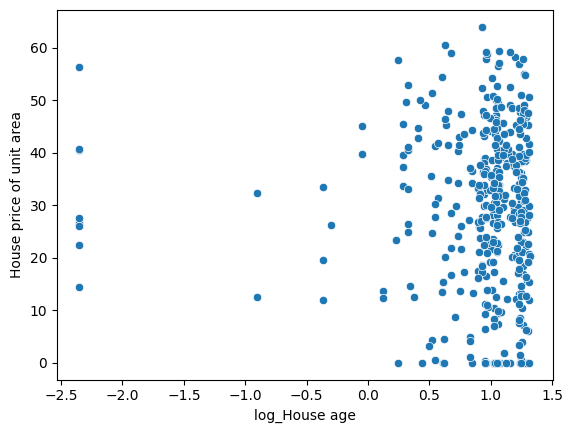

In [59]:
sns.scatterplot(data=houses,x='log_House age',y='House price of unit area')
plt.show()

In [61]:
houses['sqrt_houses_age']=np.sqrt(houses['House age'])
plt.show()

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
houses.columns


Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month', 'Day', 'log_House age',
       'sqrt_houses_age'],
      dtype='object')

In [68]:
# polynomial transformation
poly=PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)
lin_reg.fit(x_poly_train,y_train)

LinearRegression()

In [69]:
ytrain_poly_pred=lin_reg.predict(x_poly_train)
ytest_poly_pred=lin_reg.predict(x_poly_test)

In [71]:
mse_train=mean_squared_error(y_train,ytrain_poly_pred)
mse_test=mean_squared_error(y_test,ytest_poly_pred)
print(f'mean_squared_error(train):{mse_train}')
print(f'mean_squared_error(test):{mse_test}')

mae_train=mean_absolute_error(y_train,ytrain_poly_pred)
mae_test=mean_absolute_error(y_test,ytest_poly_pred)
print(f'mean absolute error(train):{mae_train}')
print(f'mean absolute error(test):{mae_test}')
r2_train=r2_score(y_train,ytrain_poly_pred)
r2_test=r2_score(y_test,ytest_poly_pred)
print(f'R2(Train):{r2_train}')
print(f'R2(Test):{r2_test}')

mean_squared_error(train):70.4218657637769
mean_squared_error(test):222.97262358040138
mean absolute error(train):6.800768511369116
mean absolute error(test):11.20862118208634
R2(Train):0.706077906410864
R2(Test):0.1940032861635166


In [72]:
# transform the y and reverse back the transformationn
y_transform=np.log(y+1)# one is to add incase we have 0 to avoid math error


In [74]:
x_trai,x_test,y_train_transformed,y_test_transformed=train_test_split(x,y_transform,test_size=0.2,random_state=42)

In [75]:
# fitting the model
lin_reg.fit(x_train,y_train_transformed)
y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)

In [76]:
y_train_pred

array([ 2.21110649,  3.90289808,  3.47522519,  3.54803837,  2.71679386,
        1.01379068,  4.09025357,  2.51387628,  0.00434386,  3.08020263,
        3.26602447,  3.75701837,  3.19403929,  2.21395891,  3.07581217,
        3.45237383,  0.98538384,  3.32668063,  3.85037908,  3.94681907,
        4.07854629,  1.13785865,  3.22535088,  3.2243802 ,  3.67247733,
        2.56628707,  3.01720564,  2.5536774 ,  1.50260951,  3.90200728,
        2.33640075,  3.75169564,  2.93609248,  3.34484545,  3.22741975,
        3.66371565,  3.52952581,  3.00038354,  3.39629713,  2.93888054,
        2.81160697,  3.41183599,  3.58945447,  3.85537961,  3.35611325,
        3.25741911,  1.79759103,  3.48548853,  3.03597678,  3.936444  ,
        2.61268104,  3.57035121,  3.05661732,  3.74320319,  2.67795112,
        3.22810071,  2.22347902,  3.99422336,  3.43505227,  3.55594723,
        3.18624876,  3.59879811,  3.8621164 ,  3.82531837,  3.61682943,
        3.90140012,  3.24321553,  2.9335895 ,  3.55126485,  3.35

In [78]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

In [79]:
print(mse_train)
print(mse_test)

0.4058996353576777
0.4469625027630566


In [80]:
# reversing the transformation 
rev_y_train_pred=np.exp(y_train_pred)
rev_y_test_pred=np.exp(y_test_pred)

In [82]:
mse_train=mean_squared_error(y_train,rev_y_train_pred)
mse_test=mean_squared_error(y_test,rev_y_test_pred)

In [83]:
print(mse_train)
print(mse_test)

821.8402710159222
900.2537276058974


Weighted least square method

when we have muilticorrilinearity apply lasso

- features with high correneality drop that column ata x train

In [32]:
houses['sqrt_houses_age']=np.log(houses['House age'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
houses['log_house_age']=np.log(houses['House age'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
houses["Transaction date"] = (
    houses["Transaction date"] - pd.Timestamp("1970-01-01")
) // pd.Timedelta("1D")

In [33]:
houses.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [34]:
houses.dtypes

Transaction date                         int64
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [35]:
x = houses.drop("House price of unit area",axis=1)
y=houses['House price of unit area']

In [36]:
x.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,15585,13.3,4082.0150,8,25.007059,121.561694
1,15587,35.5,274.0144,2,25.012148,121.546990
2,15588,1.1,1978.6710,10,25.003850,121.528336
3,15588,22.2,1055.0670,5,24.962887,121.482178
4,15589,8.5,967.4000,6,25.011037,121.479946


In [37]:
y

0       6.488673
1      24.970725
2      26.694267
3      38.091638
4      21.654710
         ...    
409    29.096310
410    33.871347
411    25.255105
412    25.285620
413    37.580554
Name: House price of unit area, Length: 414, dtype: float64

In [2]:
!pip install  scikit-learn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl (44.5 MB)


In [3]:
import sklearn

In [38]:
# separate the training set and test test

from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)# randomstate is for consistency and test_size is to split our data either to 80% to 20%

Training Set: X_train and y_train are used to train the model. The model learns patterns and relationships from this data.

Test Set: X_test and y_test are used to evaluate the model's performance. The model makes predictions on X_test, and these predictions are compared to y_test to assess accuracy and error (e.g., using Mean Squared Error).

X_train: Features used for training the model.# features/input

y_train: Target values corresponding to X_train.#target/output

X_test: Features used for testing the model.

y_test: Target values corresponding to X_test.

-training process involves fitting the model to X_train and y_train, and the evaluation process involves predicting X_test and comparing the predictions to y_test to measure performance.

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


In [41]:
#fit the model
from sklearn.linear_model import  LinearRegression

In [29]:
model=LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
# evaluate the trainig and testing metrics
# we want to check how well the model has learned our data
y_test_prediction=model.predict(x_test)

In [46]:
# import mean squared error from sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
# evaluate the test ,compare my prediction  with y_test
mean_squared_error(y_test,y_test_prediction)

np.float64(125.8333772987051)

In [48]:
# evaluate the train
y_train_pred=model.predict(x_train)

In [49]:
mean_squared_error(y_train,y_train_pred)

np.float64(117.30296310277541)

In [9]:
pip install pandas openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.3 MB/s eta 0:00:01
   ----------- --------------------------- 71.7/250.9 kB 787.7 kB/s eta 0:00:01
   -------------- ------------------------- 92.2/250.9 kB 1.1 MB/s eta 0:00:01
   ----------------------- -------------- 153.6/250.9 kB 919.0 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/250.9 kB 919.0 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 700.2 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 700.2 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 700.2 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 700.2 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 700.2 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 700.2 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [359]:
data = pd.read_excel(r"C:\Users\GASTO\Downloads\Real_Estate Data.xlsx")

In [360]:
data

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes


In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [362]:
data = pd.DataFrame(data)

In [363]:
data.dropna(subset=['Price in Millions'], inplace=True)

In [364]:
data.dropna(subset=['Price in lakhs'],inplace=True)

In [358]:
#data.drop('Price in lakhs',axis=1,inplace=True)

In [365]:
# Convert 'Price in lakhs' and 'Total TownShip Area in Acres' to float
data['Price in lakhs'] = pd.to_numeric(data['Price in lakhs'], errors='coerce')
data['Property Area in Sq. Ft.'] = pd.to_numeric(data['Property Area in Sq. Ft.'], errors='coerce')


In [366]:
float_features = data.select_dtypes(include=["float64"]).columns
print('Total number of floating features:',float_features.shape[0])
print('floating features names:',float_features.tolist())

Total number of floating features: 4
floating features names: ['Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions', 'Total TownShip Area in Acres']


In [369]:
cat_features=data.select_dtypes(include=['object']).columns
print('Total number of categorical features:',cat_features.shape[0])
print('Categorical features names:',cat_features.tolist())

Total number of categorical features: 12
Categorical features names: ['Location', 'Sub-Area', 'Propert Type', 'Company Name', 'TownShip Name/ Society Name', 'ClubHouse', 'School / University in Township ', 'Hospital in TownShip', 'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym']


In [370]:
int_features = data.select_dtypes(include=["int64"]).columns
print('Total number of interger features:',int_features.shape[0])
print('Integer features names:',int_features.tolist())

Total number of interger features: 1
Integer features names: ['Sr. No.']


In [371]:
# get the stastical information of numerical features
data.describe()

,Sr. No.,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Total TownShip Area in Acres
count,199.000000,184.000000,199.000000,199.000000,51.000000
mean,100.793970,878.483696,95.258291,9.525829,97.392157
std,57.875282,383.263438,101.869843,10.186984,266.710786
min,1.000000,113.000000,13.190000,1.319000,2.500000
25%,51.500000,666.750000,51.500000,5.150000,5.000000
50%,101.000000,791.000000,70.000000,7.000000,25.000000
75%,150.500000,997.750000,99.435000,9.943500,25.000000
max,200.000000,2447.000000,930.000000,93.000000,1000.000000


In [372]:
data.describe().shape

(8, 5)

data cleaning

In [373]:
data.isnull().sum()

Sr. No.                               0
Location                              0
Sub-Area                              0
Propert Type                          0
Property Area in Sq. Ft.             15
Price in lakhs                        0
Price in Millions                     0
Company Name                          0
TownShip Name/ Society Name           0
Total TownShip Area in Acres        148
ClubHouse                             0
School / University in Township       0
Hospital in TownShip                  0
Mall in TownShip                      0
Park / Jogging track                  0
Swimming Pool                         0
Gym                                   0
dtype: int64

<Axes: >

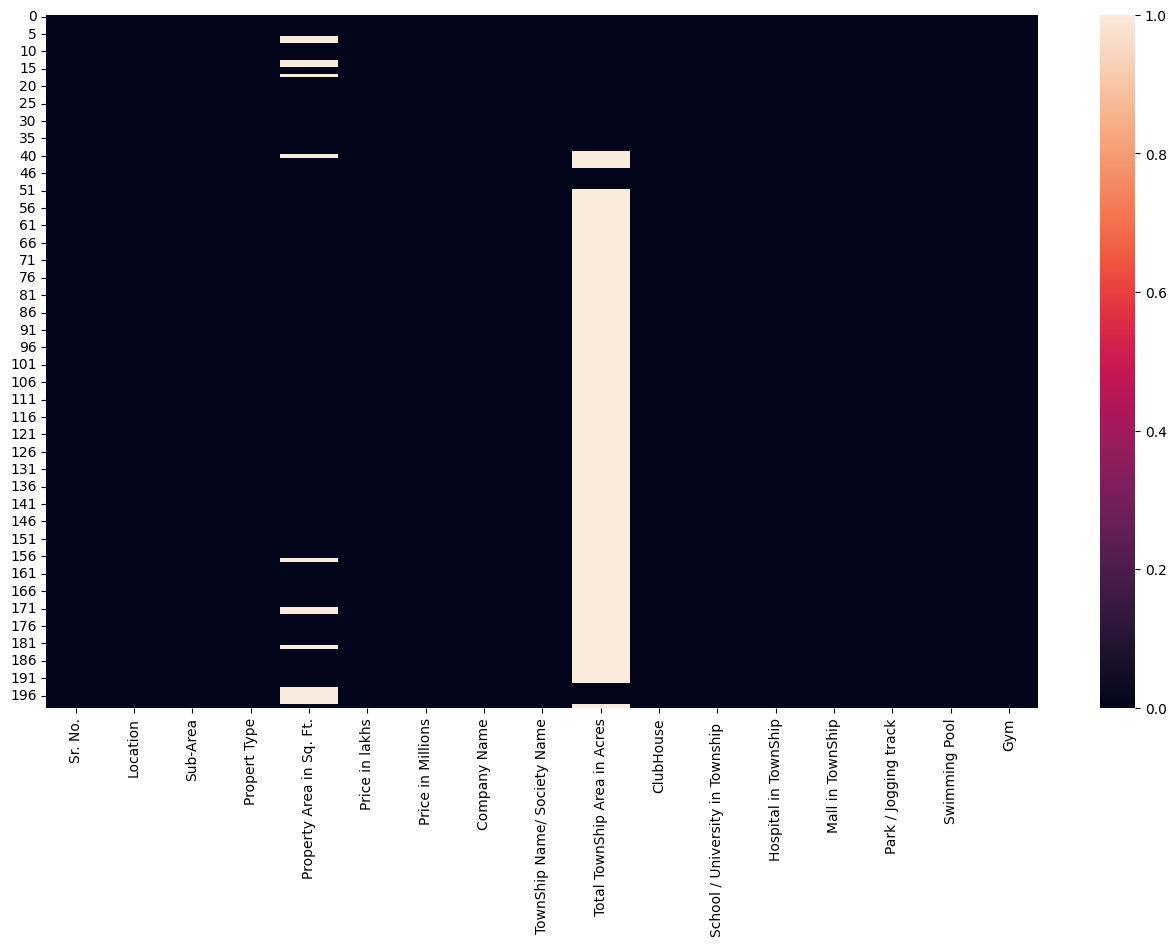

In [374]:
# hadling missing values
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())


From the visualization:
- "Total TownShip Area in Acres" has a significant amount of missing data.

- categorical features like "Property area in sq,ft",'price in lakhs','price in millions' appear to have very few or no missing values.

- the heatmap suggests that while most features have good data quality with few missing values.

In [205]:
data.columns

Index(['Sr. No.', 'Location', 'Sub-Area', 'Propert Type',
       'Property Area in Sq. Ft.', 'Price in Millions', 'Company Name',
       'TownShip Name/ Society Name', 'Total TownShip Area in Acres',
       'ClubHouse', 'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

In [375]:
data = data.set_index("Sr. No.")


In [376]:
data

,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
Sr. No.,,,,,,,,,,,,,,,,
1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492.0,39.00,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774.0,65.00,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889.0,74.00,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018.0,89.00,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,"Pune, Maharashtra, India",Mahalunge,2BHK,743.0,74.00,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,"Pune, Maharashtra, India",BANER,3bhk,NaN,160.00,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
197,"Pune, Maharashtra, India",BANER,4bhk,NaN,230.00,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
198,"Pune, Maharashtra, India",BANER,2 bhk,NaN,95.00,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes


In [377]:
#get the percentage for every feature
null_percent=data.isnull().sum()/data.shape[0]*100
null_percent


Location                             0.000000
Sub-Area                             0.000000
Propert Type                         0.000000
Property Area in Sq. Ft.             7.537688
Price in lakhs                       0.000000
Price in Millions                    0.000000
Company Name                         0.000000
TownShip Name/ Society Name          0.000000
Total TownShip Area in Acres        74.371859
ClubHouse                            0.000000
School / University in Township      0.000000
Hospital in TownShip                 0.000000
Mall in TownShip                     0.000000
Park / Jogging track                 0.000000
Swimming Pool                        0.000000
Gym                                  0.000000
dtype: float64

In [378]:
miss_values_50_perc=null_percent[null_percent>50]
miss_values_50_perc

Total TownShip Area in Acres    74.371859
dtype: float64

In [321]:
data.drop('Total TownShip Area in Acres',axis=1,inplace=True)

In [108]:
#data["Total TownShip Area in Acres"].value_counts()

Total TownShip Area in Acres
25.0      19
10.0       9
3.5        6
1000.0     4
5.0        4
50.0       3
100.0      2
3.0        2
2.5        2
Name: count, dtype: int64

In [379]:
#missing value imputation
missing_value_feature = null_percent[null_percent>0]
print('total missing values features',len(missing_value_feature))

total missing values features 2


In [380]:
missing_value_feature.dtypes

dtype('float64')

In [381]:
missing_value_feature

Property Area in Sq. Ft.         7.537688
Total TownShip Area in Acres    74.371859
dtype: float64

In [325]:
missing_value_feature

Property Area in Sq. Ft.         7.537688
Total TownShip Area in Acres    74.371859
dtype: float64

In [382]:
float_na_feat=missing_value_feature[missing_value_feature.keys().isin(float_features)]
print('total number of float missing features',len(float_na_feat))

total number of float missing features 2


In [383]:
cat_na_feat=missing_value_feature[missing_value_feature.keys().isin(cat_features)]
print('Total  number of categorical missing features',len(cat_na_feat))

Total  number of categorical missing features 0


mode mostly used in categorical data in our data there is no missing value of  categorical type

handling Property Area in Sq. Ft.         8.0

In [384]:
df_mvi=data.copy()
df_mvi.shape

(199, 16)

In [ ]:
#boxHistplot(data["Property Area in Sq. Ft."])

In [122]:
#mean_df = data["Property Area in Sq. Ft."].mean()
#df_mvi["Property Area in Sq. Ft."].replace(np.nan,mean_df,inplace=True)
#df_mvi["Property Area in Sq. Ft."].isnull().sum()

C:\Users\GASTO\AppData\Local\Temp\ipykernel_11244\904087635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Property Area in Sq. Ft."].replace(np.nan,mean_df,inplace=True)


np.int64(0)

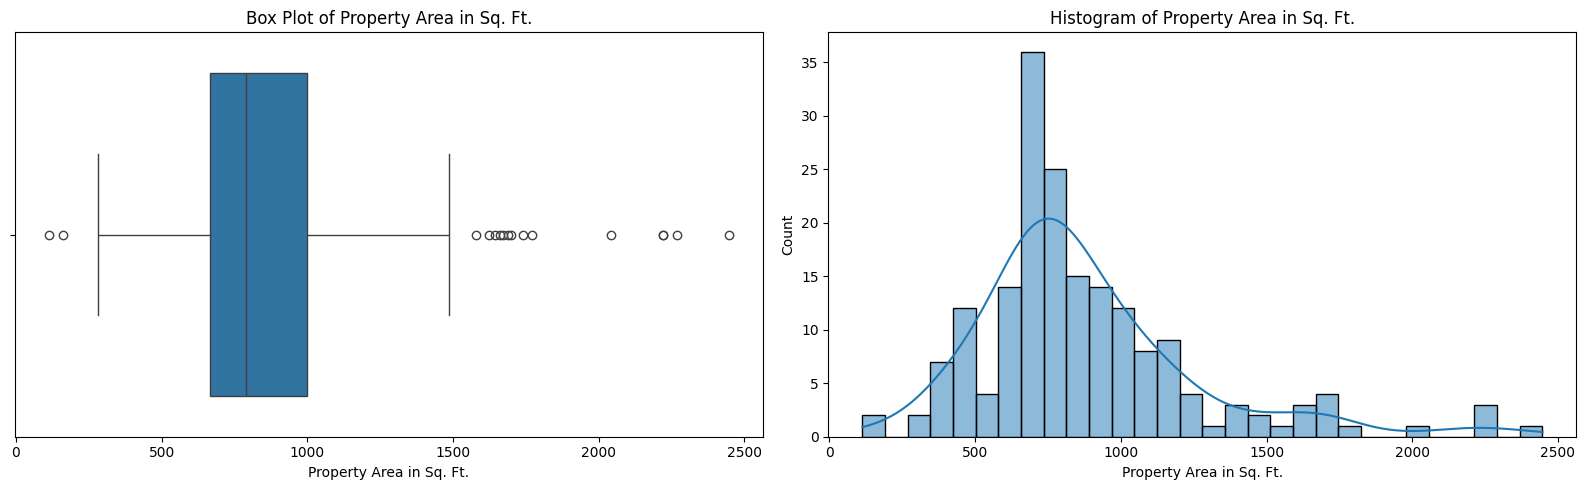

In [389]:
def boxHistplot(data, column, figsize=(16, 5)):
    plt.figure(figsize=figsize)

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title("Box Plot of " + column)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title("Histogram of " + column)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


# Example usage
boxHistplot(data, "Property Area in Sq. Ft.")

the histogram somehow represent a normal distribution

In [390]:
data["Property Area in Sq. Ft."] = data["Property Area in Sq. Ft."].fillna(
    data["Property Area in Sq. Ft."].mean()
)
data["Property Area in Sq. Ft."].isnull().sum()

np.int64(0)

#handling missingness in Price in lakhs  

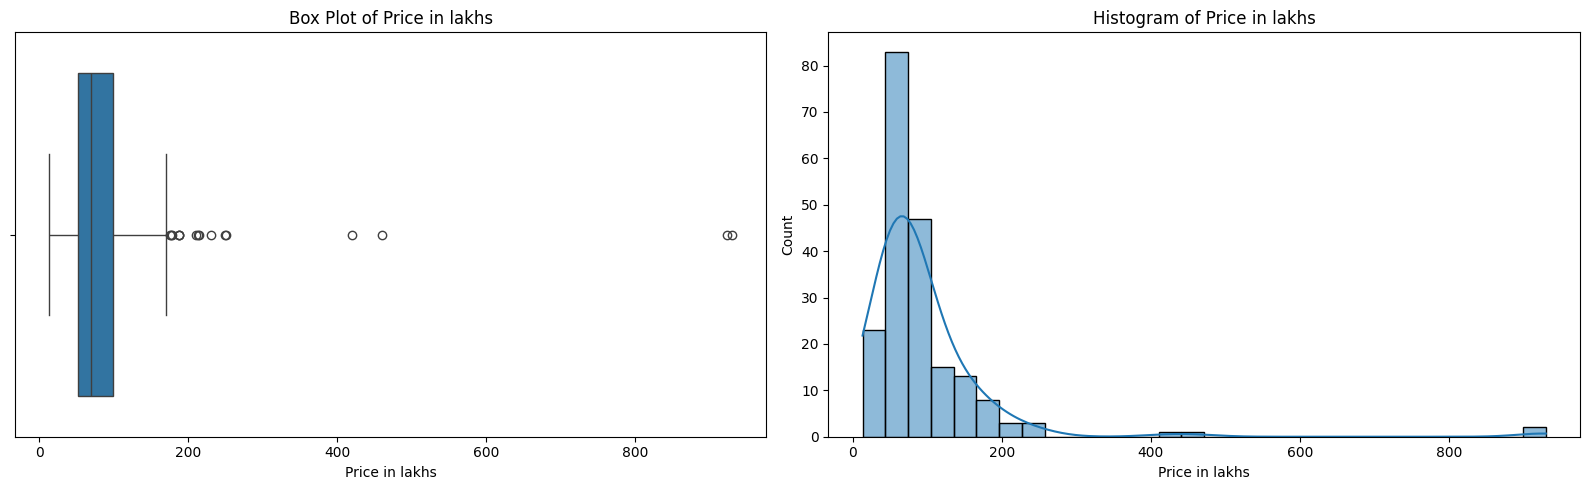

In [273]:
def boxHistplot(data, column, figsize=(16, 5)):
    plt.figure(figsize=figsize)

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title("Box Plot of " + column)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title("Histogram of " + column)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


# Example usage
boxHistplot(data, "Price in lakhs")

 A positive skew (right skew).

  -This is indicated by the long tail extending to the right, with the majority of the data clustered towards the lower end of the price range. 

  -The box plot on the left also supports this, as the median line is closer to the lower quartile, and there are several outliers on the higher end, indicating a skewed distribution.
  
  -using median to implement the missingness would really help as its not affected by extreme values and outliers as using mean 

In [274]:
data["Price in lakhs"] = data["Price in lakhs"].fillna(data["Price in lakhs"].median())
data["Price in lakhs"].isnull().sum()

np.int64(0)

handling the miss values on Price in Millions    

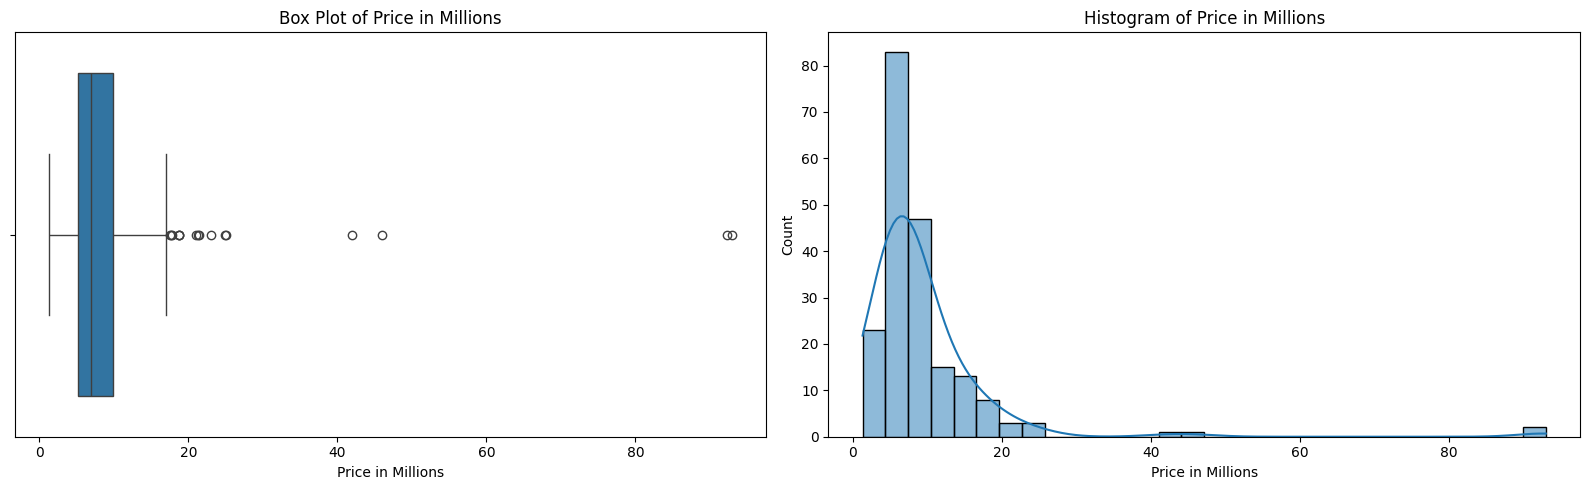

In [331]:
def boxHistplot(data, column, figsize=(16, 5)):
    plt.figure(figsize=figsize)

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title("Box Plot of " + column)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title("Histogram of " + column)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


# Example usage
boxHistplot(data, "Price in Millions")

any time we have missingness in our prediction drop that row

In [276]:
data["Price in Millions"] = data["Price in Millions"].fillna(
    data["Price in Millions"].median()
)
data["Price in Millions"].isnull().sum()

np.int64(0)

handling missingness in Total TownShip Area in Acres 

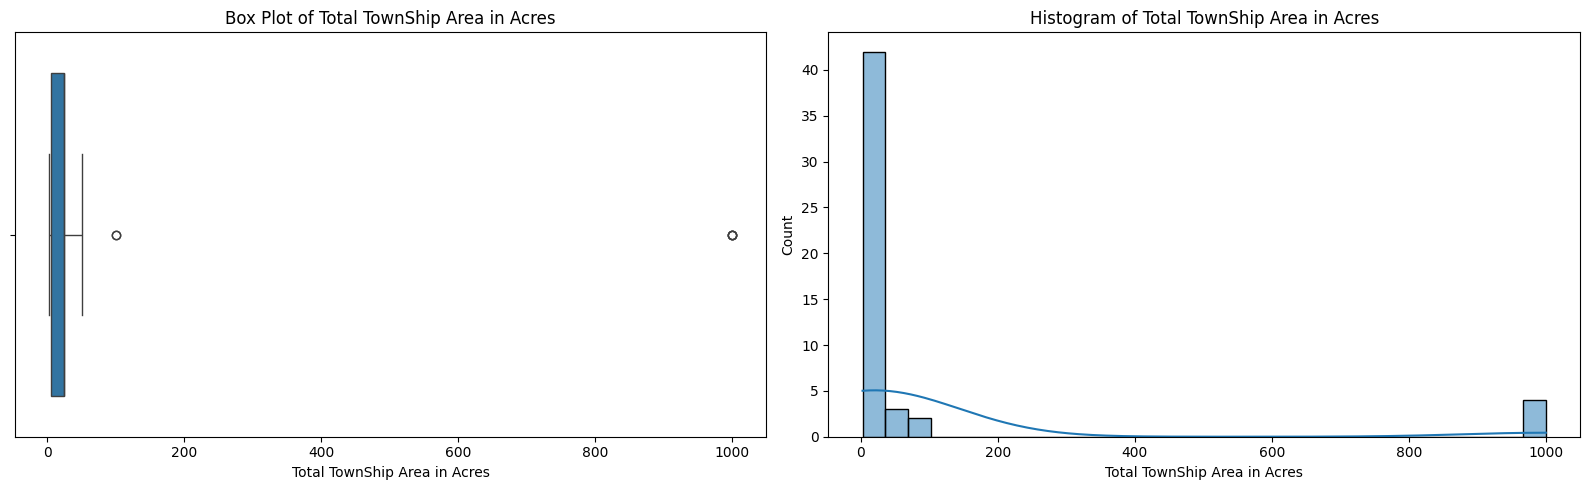

In [386]:
def boxHistplot(data, column, figsize=(16, 5)):
    plt.figure(figsize=figsize)

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column])
    plt.title("Box Plot of " + column)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title("Histogram of " + column)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


# Example usage
boxHistplot(data, "Total TownShip Area in Acres")

from the graph there some visualization seen:

- majority of the data points are clustered at the lower end range with a few outliers seen abit far from the rest of the data indicating extreme values.

- the histogram shows that the data is a right skew( positive) that shows  a longer tail implying that,there are a few properties with  significant larger area compared to the rest and at the peak end most data is clustered towards the end showing most properties  have smaller township areas.

- drop the column

In [123]:
data["Total TownShip Area in Acres"] = data["Total TownShip Area in Acres"].fillna(
    data["Total TownShip Area in Acres"].median()
)
data["Total TownShip Area in Acres"].isnull().sum()

np.int64(0)

In [387]:
data.drop('Total TownShip Area in Acres',axis=1,inplace=True)

In [391]:
data.isnull().sum()

Location                            0
Sub-Area                            0
Propert Type                        0
Property Area in Sq. Ft.            0
Price in lakhs                      0
Price in Millions                   0
Company Name                        0
TownShip Name/ Society Name         0
ClubHouse                           0
School / University in Township     0
Hospital in TownShip                0
Mall in TownShip                    0
Park / Jogging track                0
Swimming Pool                       0
Gym                                 0
dtype: int64

In [163]:
cat_features

Index(['Location', 'Sub-Area', 'Propert Type', 'Company Name',
       'TownShip Name/ Society Name', 'ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

# encoding on the categorical variables 
 - I prefered One hot encoding due to this reasons:

  - One_ Hot Encoding create separate binary columns for each category preventing the model from assuming any ordinal relationship between the categories which is important since our data is not ordered.

   - it easy to understand and encode the data.
  
  - it prevent situations where one feature is highly correlated with another in linear models.


In [ ]:
data[[cat_features]].head()

In [392]:
# One_Hot_encoding
data=pd.get_dummies(data,columns=cat_features)


converting my encoded data to one numeric_type i.e float for easier implimentation of linear regression

In [393]:
data=data.astype(float)

In [394]:
data.head(10)

,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,"Location_Pune, Maharashtra, India",Sub-Area_Akurdi,Sub-Area_BANER,Sub-Area_BT Kawade RD,Sub-Area_Balewadi,Sub-Area_Baner,Sub-Area_Bavdhan,...,Park / Jogging track_yes,Swimming Pool_No,Swimming Pool_Yes,Swimming Pool_no,Swimming Pool_no,Swimming Pool_yes,Gym_Yes,Gym_no,Gym_no,Gym_yes
Sr. No.,,,,,,,,,,,,,,,,,,,,,
1,492.000000,39.0,3.9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,774.000000,65.0,6.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,889.000000,74.0,7.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1018.000000,89.0,8.9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,743.000000,74.0,7.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,975.000000,95.0,9.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,878.483696,75.0,7.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,878.483696,100.0,10.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,905.000000,65.0,6.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [173]:
data.columns

Index(['Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Total TownShip Area in Acres', 'Location_Pune, Maharashtra, India',
       'Sub-Area_Akurdi', 'Sub-Area_BANER', 'Sub-Area_BT Kawade RD',
       'Sub-Area_Balewadi', 'Sub-Area_Baner',
       ...
       'Park / Jogging track_yes', 'Swimming Pool_No', 'Swimming Pool_Yes',
       'Swimming Pool_no', 'Swimming Pool_no ', 'Swimming Pool_yes', 'Gym_Yes',
       'Gym_no', 'Gym_no ', 'Gym_yes'],
      dtype='object', length=195)

training the model via linear regression

In [395]:
x = data.drop("Price in Millions", axis=1)
y = data["Price in Millions"]

In [396]:
x.head()

,Property Area in Sq. Ft.,Price in lakhs,"Location_Pune, Maharashtra, India",Sub-Area_Akurdi,Sub-Area_BANER,Sub-Area_BT Kawade RD,Sub-Area_Balewadi,Sub-Area_Baner,Sub-Area_Bavdhan,Sub-Area_Hinjewadi,...,Park / Jogging track_yes,Swimming Pool_No,Swimming Pool_Yes,Swimming Pool_no,Swimming Pool_no,Swimming Pool_yes,Gym_Yes,Gym_no,Gym_no,Gym_yes
Sr. No.,,,,,,,,,,,,,,,,,,,,,
1,492.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,774.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,889.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1018.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,743.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [397]:
y

Sr. No.
1       3.900
2       6.500
3       7.400
4       8.900
5       7.400
        ...  
196    16.000
197    23.000
198     9.500
199    13.500
200     9.068
Name: Price in Millions, Length: 199, dtype: float64

In [398]:
import sklearn

In [399]:
# separating training set and test set
from sklearn.model_selection import train_test_split

In [400]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [401]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 193)
(40, 193)
(159,)
(40,)


In [402]:
# fit the model
from sklearn.linear_model import LinearRegression

In [344]:
model = LinearRegression()

In [345]:
model.fit(x_train, y_train)

LinearRegression()

In [403]:
# evaluate the trainig and testing metrics
# we want to check how well the model has learned our data
y_test_prediction = model.predict(x_test)

In [404]:
from sklearn.metrics import mean_squared_error

In [405]:
# evaluate the test ,compare my prediction  with y_test
# predicting on the data we have not seen before
mean_squared_error(y_test, y_test_prediction)

np.float64(5.768311176347411e-28)

In [406]:
# evaluate the train
# analysing how well the model the  learns the data
y_train_pred = model.predict(x_train)

In [407]:
mean_squared_error(y_train, y_train_pred)

np.float64(6.071863007659796e-28)

In [408]:
#predictions
Residuals=y_test-y_test_prediction

In [409]:
from sklearn.preprocessing import  PolynomialFeatures

In [410]:
x_single_feature = x.iloc[:, 0].values.reshape(-1, 1)

In [411]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(x_single_feature)

In [412]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [413]:
# Train the model on the transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [414]:
y_pred_poly = model.predict(X_poly)

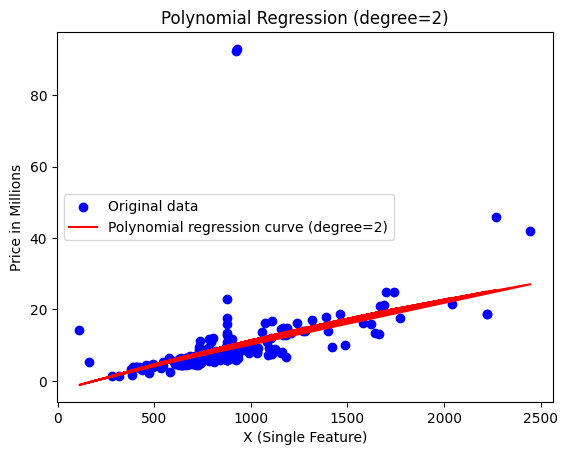

In [415]:
# Visualization of the original data and the polynomial regression curve
plt.scatter(x_single_feature, y, color="blue", label="Original data")
plt.plot(
    x_single_feature,
    y_pred_poly,
    color="red",
    label=f"Polynomial regression curve (degree={degree})",
)
plt.xlabel("X (Single Feature)")
plt.ylabel("Price in Millions")
plt.legend()
plt.title(f"Polynomial Regression (degree={degree})")
plt.show()

In [417]:
data.columns

Index(['Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Location_Pune, Maharashtra, India', 'Sub-Area_Akurdi',
       'Sub-Area_BANER', 'Sub-Area_BT Kawade RD', 'Sub-Area_Balewadi',
       'Sub-Area_Baner', 'Sub-Area_Bavdhan',
       ...
       'Park / Jogging track_yes', 'Swimming Pool_No', 'Swimming Pool_Yes',
       'Swimming Pool_no', 'Swimming Pool_no ', 'Swimming Pool_yes', 'Gym_Yes',
       'Gym_no', 'Gym_no ', 'Gym_yes'],
      dtype='object', length=194)